# Lab5 OpenCV 作业

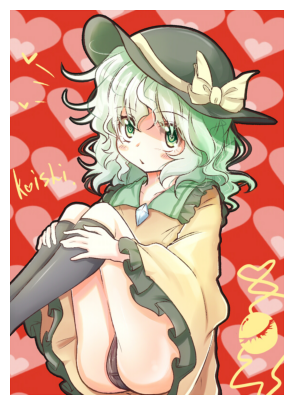

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy
def show_picture(menu, cmap=None, title=None):
	figure = plt.figure('Image', figsize=(10,5))
	for it,img in enumerate(menu):
		if cmap is None:
			x = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
		else:
			x = img
		plt.subplot(1, len(menu), it+1)
		plt.imshow(x, cmap=cmap)
		plt.axis('off')
		if title is not None:
			plt.title(title[it])
	plt.show()
	plt.close(fig=figure)

path = 'test.jpg'
img = cv2.imread(path)
show_picture([img])

#### 将rgb图像转为灰度、二值化，并展示

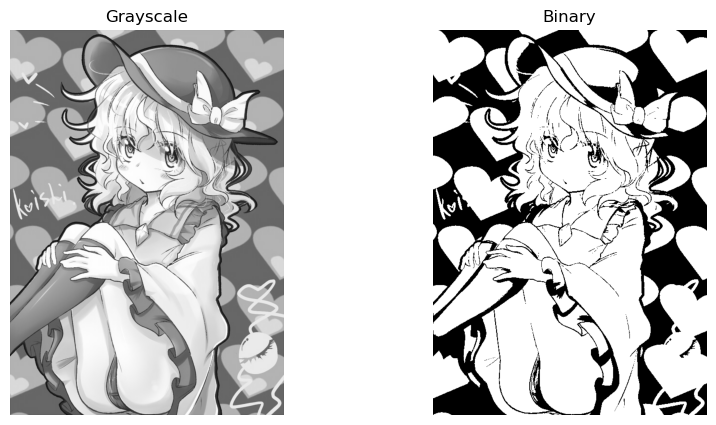

In [21]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show_picture([gray,bin],title=['Grayscale', 'Binary'])

#### 挑选一个滤波核，尝试滤波并展示效果

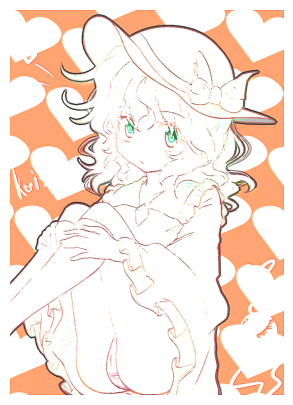

In [22]:
kernel = np.array([[0,-1,0],[-1,5,1],[0,-1,0]]) # 锐化
dst = cv2.filter2D(img, -1, kernel)  
show_picture([dst])

#### 执行傅里叶变换的滤波

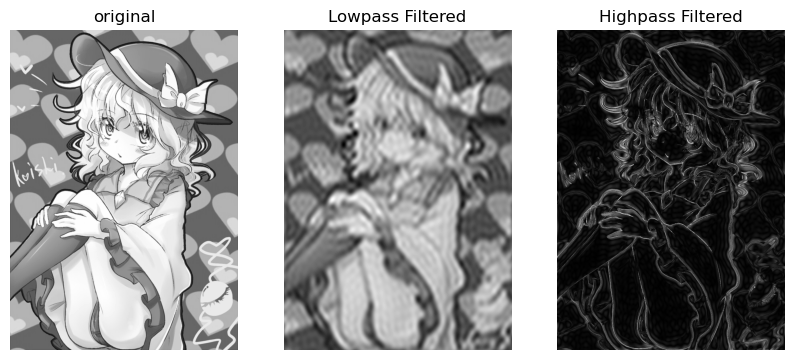

In [26]:
import copy
f = np.fft.fft2(gray) # 对灰度图像进行二维傅里叶变换，得到频谱。
high = np.fft.fftshift(f) # 将零频率移到频谱的中心。
low = copy.deepcopy(high)
crow, ccol = img.shape[0]//2, img.shape[1]//2 # 中心位置的坐标
high[crow-30:crow+30, ccol-30:ccol+30] = 0
low -= high
ishift1 = np.fft.ifftshift(high)
iimg1 = np.fft.ifft2(ishift1) # 回到空域
iimg1 = np.abs(iimg1)
ishift2 = np.fft.ifftshift(low)
iimg2 = np.fft.ifft2(ishift2) # 回到空域
iimg2 = np.abs(iimg2)
show_picture([gray,iimg2,iimg1], cmap='gray', title=['original', 'Lowpass Filtered','Highpass Filtered'])

- *使用 OpenCV 进行滤波*

低通滤波器的作用是保留图像的低频成分（例如光滑、均匀区域），并去除高频成分（例如噪声和细节）。其效果通常是模糊图像，去除细小的高频噪声。

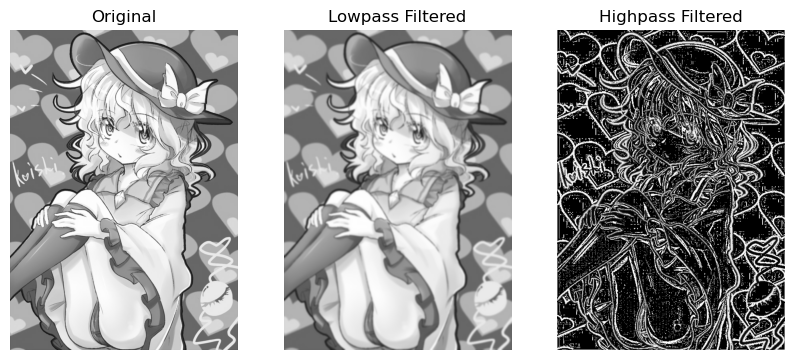

In [31]:
import cv2
import numpy as np

blur = cv2.GaussianBlur(gray, (9, 9), 0)
high = gray - blur
show_picture([gray,blur,high], title=['Original','Lowpass Filtered','Highpass Filtered'])

#### 执行角点检测程序

[[ 8.9304075e-09  8.9304075e-09  8.9304075e-09 ... -9.6872554e-09
   1.0948400e-07  9.9881561e-08]
 [ 8.9304075e-09  8.9304075e-09  8.9304075e-09 ... -9.6872554e-09
   1.0948400e-07  9.9881561e-08]
 [ 8.9304075e-09  8.9304075e-09  8.9304075e-09 ... -9.6872554e-09
   1.2999638e-07  1.1957704e-07]
 ...
 [ 4.0185773e-07  4.0185773e-07  4.4133458e-07 ...  0.0000000e+00
  -9.0504431e-09 -8.6287297e-09]
 [ 9.3343542e-06  9.3343542e-06 -1.6536467e-05 ... -9.6872554e-09
   1.2999638e-07  1.1957704e-07]
 [ 4.2464853e-05  4.2464853e-05  7.7004712e-05 ... -9.6872554e-09
   1.0948400e-07  9.9881561e-08]]


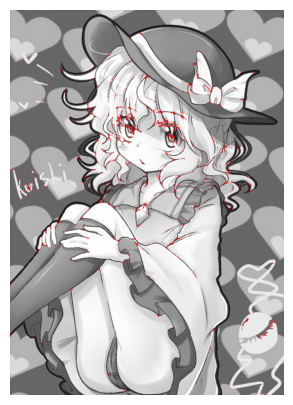

In [ ]:
import cv2
import numpy as np
 
blockSize = 2 # 检测窗口大小
ksize = 3 # Sobel的卷积核
k = 0.04 # 权重系数
 
# Harris角点检测
dst = cv2.cornerHarris(gray,blockSize,ksize, k)
print(dst)
# Harris角点展示
tag = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
tag[dst>0.01*dst.max()] = [0, 0, 255]
show_picture([tag]) # 注：边缘用红色标注